In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv('heart.csv')
#iris_df['target'] = iris.target

About Dataset

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [26]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [27]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

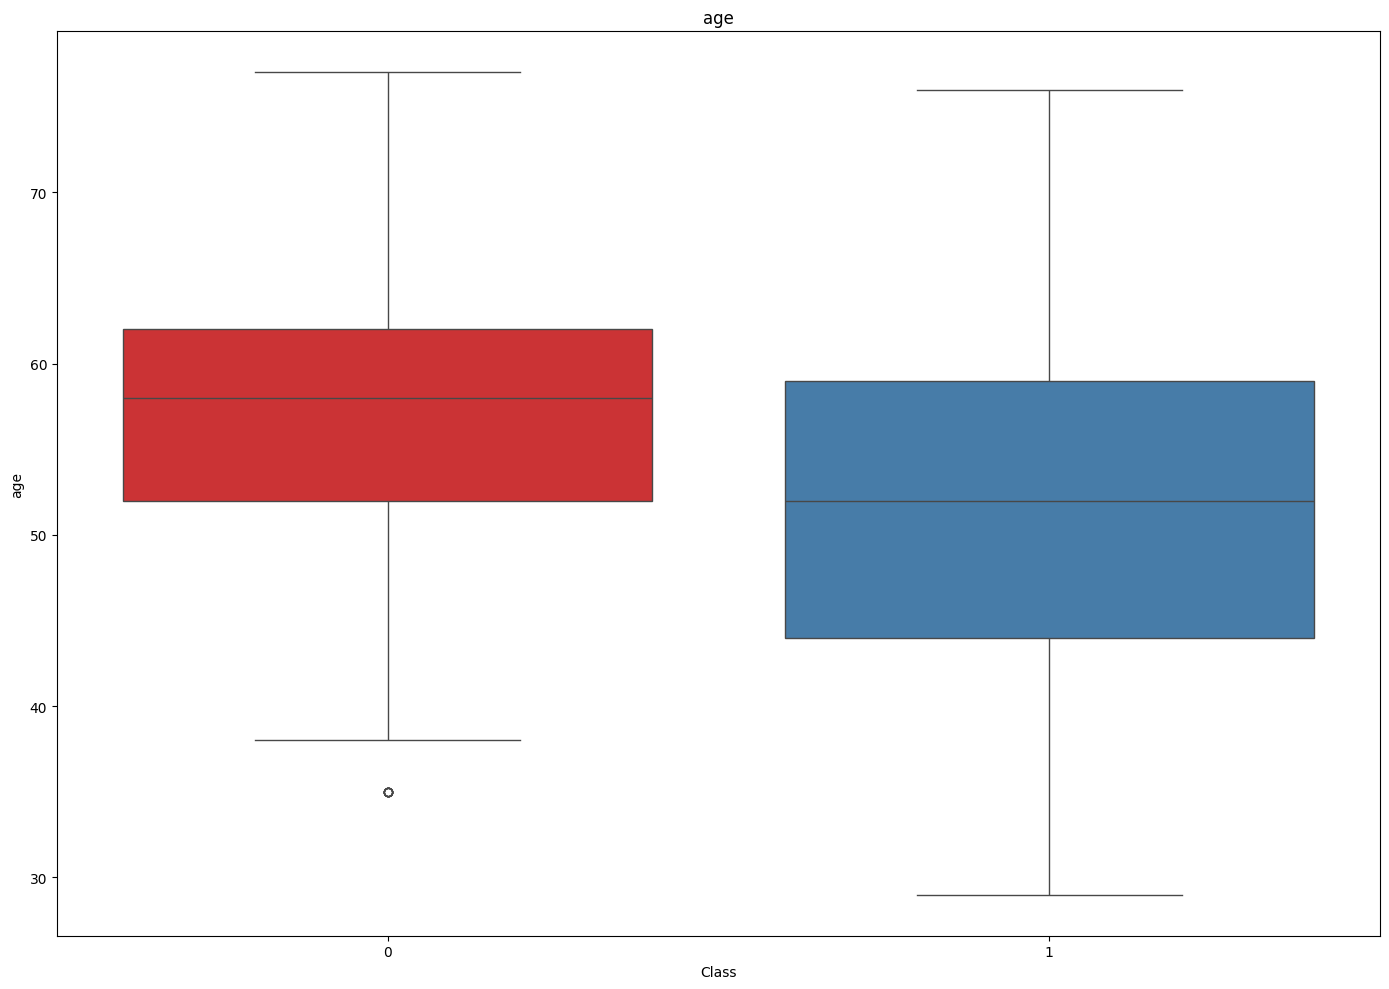

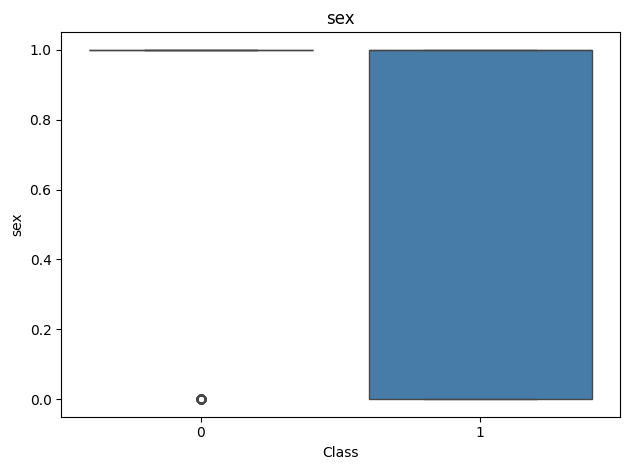

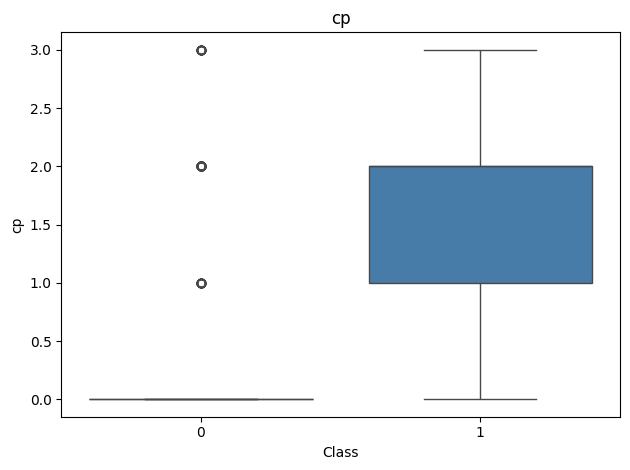

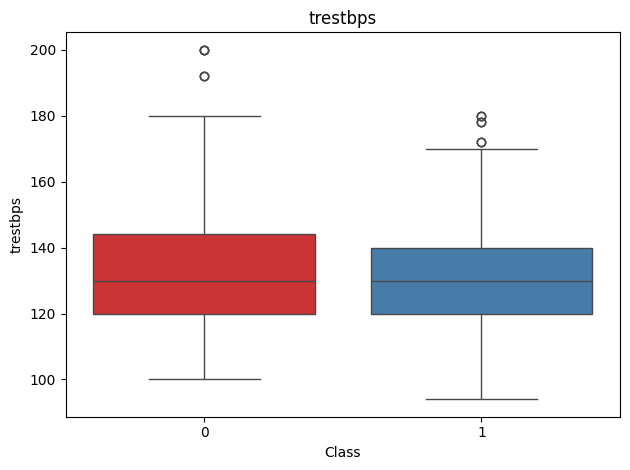

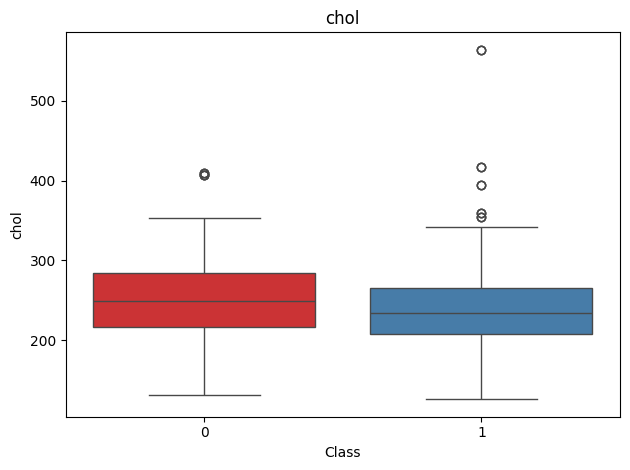

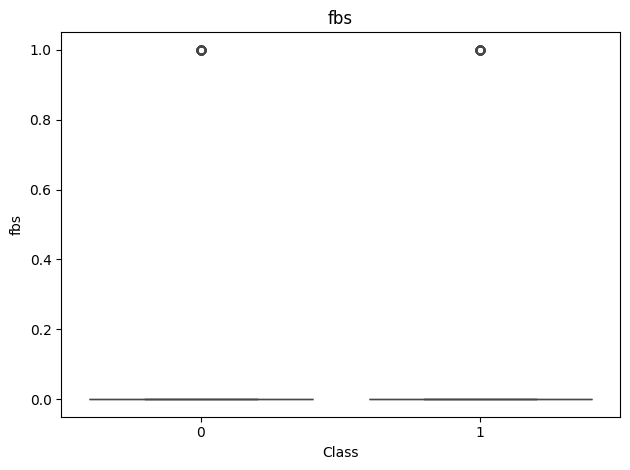

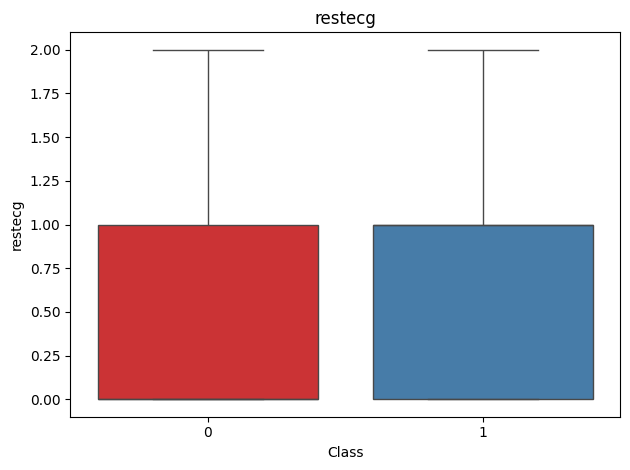

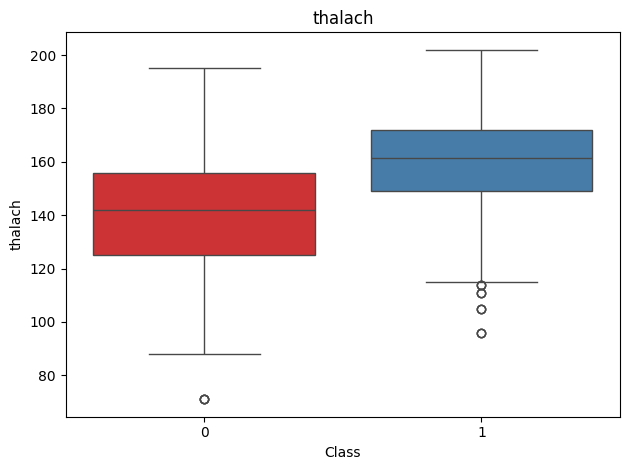

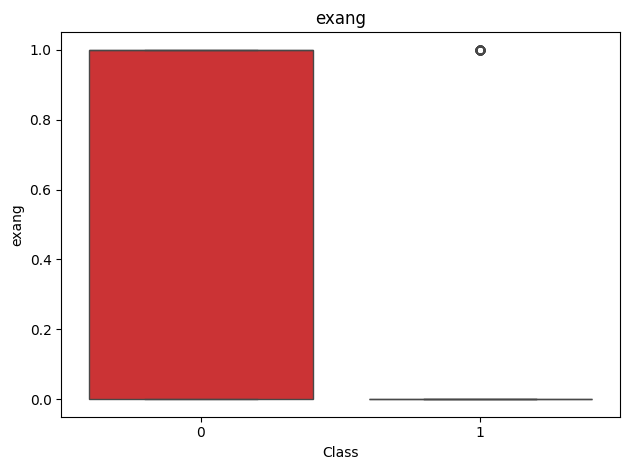

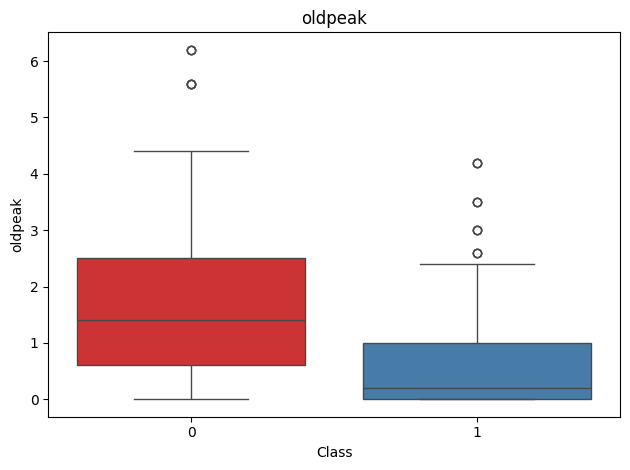

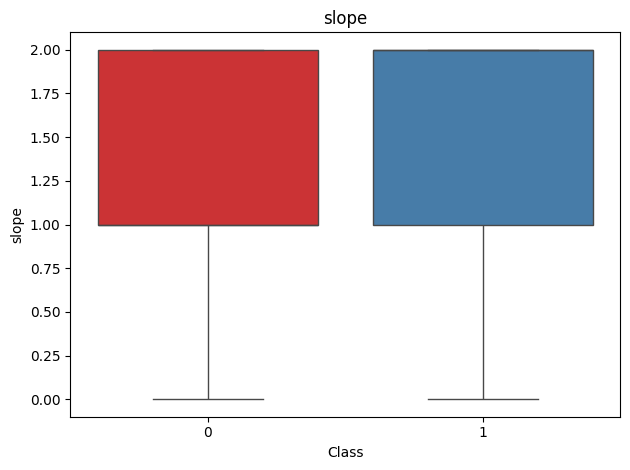

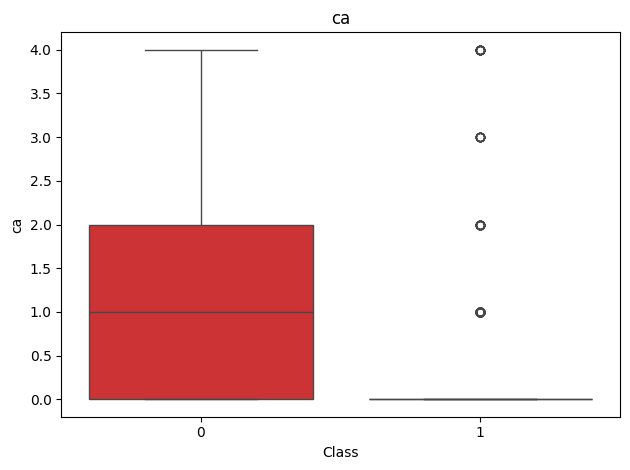

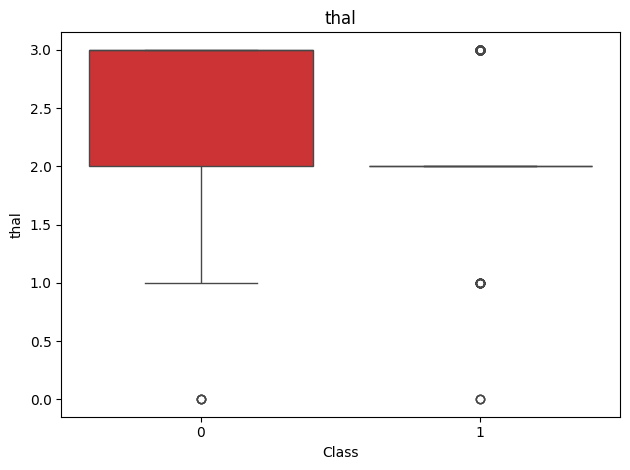

In [29]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x='target', y=col, data=df, palette='Set1')
    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [30]:
X=df.iloc[:,0:-1]
y=df['target']

In [31]:
ss = StandardScaler()
ss.fit_transform(X)

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

Creating 10 samples

In [32]:
samples=[]
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=i)
  samples.append((X_train, X_test, y_train, y_test))

Fitness Function

In [33]:
kernels=['linear','poly','rbf','sigmoid']
ans= pd.DataFrame(columns=['Sample','Best Accuracy','Best Kernel','Best Nu','Best Epsilon'])

In [34]:
def fitness(kernel, C, gamma):
  svm=SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
  svm.fit(X_train, y_train)
  y_pred=svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

In [35]:
for i in range(len(samples)):
  best_accuracy=0
  best_C= 0
  best_gamma=0
  for kernel in kernels:
    X_train, X_test, y_train, y_test =samples[i]
    C=np.random.uniform(0,10)
    gamma=np.random.uniform(0,10)
    score=fitness(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy=round(score,2)
      best_C=round(C,2)
      best_gamma=round(gamma,2)
      best_kernel=kernel
  ans.loc[i]=[i+1,best_accuracy,best_kernel,best_C,best_gamma]

Result Table

In [37]:
ans

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.99,rbf,5.13,0.16
1,2,0.98,rbf,0.66,0.27
2,3,0.95,rbf,0.71,1.18
3,4,0.99,rbf,8.21,1.81
4,5,1.00,rbf,7.58,2.07
5,6,0.97,rbf,2.95,3.12
6,7,0.96,rbf,9.57,1.25
7,8,0.99,rbf,4.25,3.41
8,9,0.99,rbf,6.90,6.75
9,10,0.97,rbf,6.44,3.46


Convergence Graph

In [38]:
X_train, X_test, y_train, y_test = samples[ans['Best Accuracy'].idxmax()]

In [39]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=ans['Best Kernel'].iloc[ans['Best Accuracy'].idxmax()], 
                                                        C=ans['Best Nu'].iloc[ans['Best Accuracy'].idxmax()],
                                                        gamma=ans['Best Epsilon'].iloc[ans['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [40]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

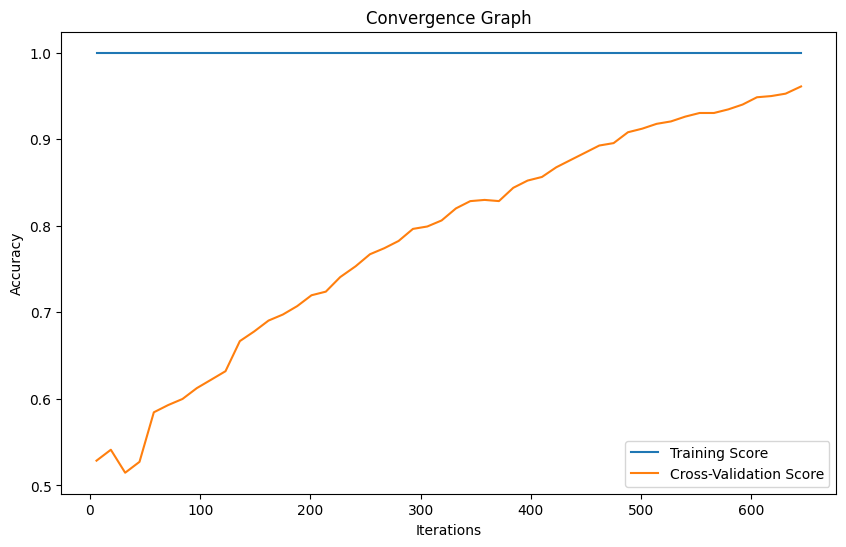

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()